In [1]:
import model
import fitness
import utils
import numpy as np
from scipy.stats import linregress
import scipy
from matplotlib import pyplot as plt

C:\Users\Leont\AppData\Local\Temp\ipykernel_8760\4147002401.py:69: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]


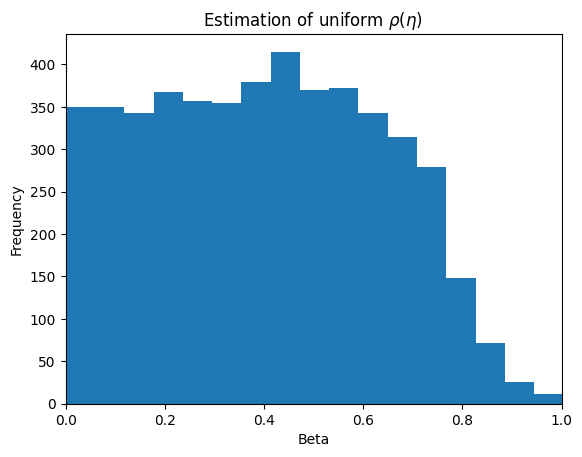

In [ ]:
""" beta estimation on averaged simulation

    estimation is far from good for uniform, but seems to work overall """

size = 5000
iterations = 100
rng = np.random.default_rng(1234)
fitness_data = rng.random(size)

times, node_degrees = utils.simulate(size, iterations, fitness_data)

mean_degrees_uniform = utils.get_means(node_degrees)
degrees_new, times_new = mean_degrees_uniform, times[0]



beta = utils.estimate_beta(degrees_new, times_new)

# Plotting the fitness (beta) distribution histogram
plt.figure()
plt.hist(beta, bins=100)
plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.title(r'Estimation of uniform $ \rho(\eta) $ ')
plt.xlim(0,1)
plt.savefig('uniform_fitness_estimation.png', dpi=400)

C:\Users\Leont\AppData\Local\Temp\ipykernel_9552\4147002401.py:69: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]
C:\Users\Leont\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


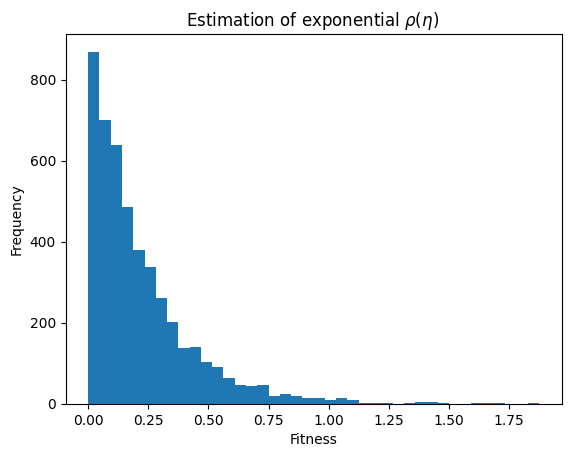

In [5]:
""" for exponential fitness """

size = 5000
iterations = 100
rng = np.random.default_rng(1234)
fitness_data = rng.exponential(1.0, size)

times, node_degrees = utils.simulate(size, iterations, fitness_data)

mean_degrees = utils.get_means(node_degrees)
degrees_new, times_new = mean_degrees, times[0]



beta = utils.estimate_beta(degrees_new, times_new)

plt.figure()
plt.hist(beta, bins=40)
plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.title(r'Estimation of exponential $ \rho(\eta) $ ')
plt.savefig('exp_fitness_estimation.png', dpi=400)

In [18]:
generator = fitness.generator()

generator.set_current_distribution('beta')
generator.set_param_beta(2, 2)

n_samples = 3000

y_samples = []
for _ in range(n_samples):
    y_samples.append(generator.generate_value())

fitness_data = y_samples

C:\Users\Leo\AppData\Local\Temp\ipykernel_15736\3917182519.py:3: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]


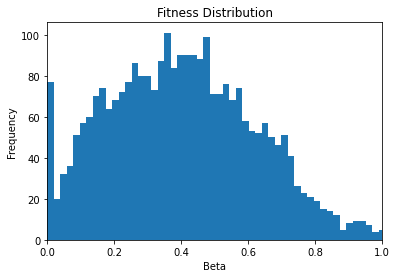

In [32]:
""" for beta fitness distribution """

size = 3000
iterations = 20

times, node_degrees = utils.simulate(size, iterations, fitness_data)

mean_degrees = utils.get_means(node_degrees)

degrees_new, times_new = mean_degrees, times[0]

beta = utils.estimate_beta(degrees_new, times_new)

plt.hist(beta, bins=300)
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title('Fitness Distribution')
plt.xlim(0, 1)

C:\Users\Leont\AppData\Local\Temp\ipykernel_11000\4147002401.py:69: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]


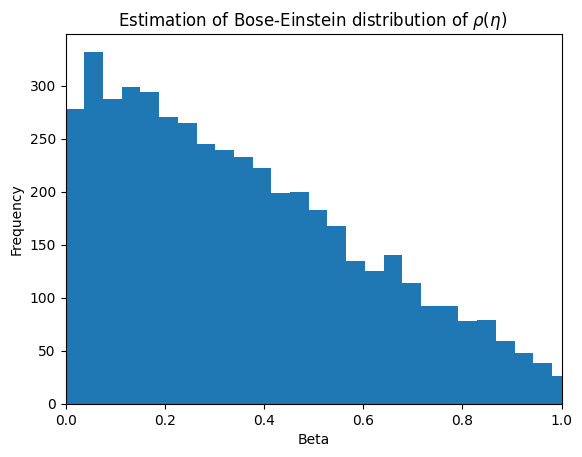

In [13]:
""" for Bose-Einstein fitness distribution """
generator = fitness.generator()

generator.set_current_distribution('be')

n_samples = 5000

# Generate values
y_samples = []

for _ in range(n_samples):
    y_samples.append(generator.generate_value())

fitness_data = y_samples


size = n_samples
iterations = 100

times, node_degrees = utils.simulate(size, iterations, fitness_data)
mean_degrees_be = utils.get_means(node_degrees)
degrees_new, times_new = mean_degrees_be, times[0]

beta = utils.estimate_beta(degrees_new, times_new)

plt.hist(beta, bins=100)
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title(r'Estimation of Bose-Einstein distribution of $ \rho(\eta) $ ')
plt.xlim(0, 1)
plt.savefig('be_fitness_estimation.png', dpi=400)